<a href="https://colab.research.google.com/github/Ghost4681/Enosium/blob/master/Bank_loan_repayability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Importing and processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/dataset.csv")
#Reading the dataset

Dropping unnecessary columns to avoid outliers in the dataset

In [ ]:
df=df.drop(['Number of years of employment','Is there telephone number available','Number of years of stay in current address','Purpose of taking loan','Working abroad or not'],axis='columns')
df
df=df.iloc[:,1:]

In [ ]:
df=df.iloc[:,:-1]

Changing the output columns as 0 and 1 from 1 and 2 for convinence

In [ ]:
df['Loan Defaulted or not'] = df['Loan Defaulted or not'].apply(lambda x: x-1)
df

,Number of people who will provide maintenance,Loan History,loan amount taken,Guarantor or Debtor,Marital Status,Number of loans taken from current bank,Age of the applicant in Number of Years,amount in current account,amount in savings account,% of income paid as installment,Other loans plans taken,time duration for loan,Owned property,Type of job performed,Type of Housing,Loan Defaulted or not
0,1,critical account/other loans existing (not at ...,1028,none,female and divorced/seperated/married,2,36,no current account,less than 100,4,none,18,Real Estate,skilled employee / official,own,0
1,1,existing loans paid back duly till now,10222,none,male and single,1,37,no current account,no savings account,4,stores,48,car or other property,skilled employee / official,own,0
2,1,existing loans paid back duly till now,701,none,male and married/widowed,1,40,less than 0,less than 100,4,none,12,Real Estate,unskilled - resident,own,0
3,1,existing loans paid back duly till now,1670,none,female and divorced/seperated/married,1,22,between 0 and 200,less than 100,4,none,9,car or other property,skilled employee / official,own,1
4,1,critical account/other loans existing (not at ...,1163,none,male and single,1,44,no current account,between 500 and 1000,4,none,12,Real Estate,skilled employee / official,own,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,delay in paying off loans in the past,15653,none,male and single,2,21,no current account,less than 100,2,none,60,car or other property,skilled employee / official,own,0
596,1,critical account/other loans existing (not at ...,1255,none,male and single,2,61,no current account,less than 100,4,none,12,Real Estate,unskilled - resident,own,0
597,1,existing loans paid back duly till now,3835,none,female and divorced/seperated/married,1,45,no current account,no savings account,2,none,36,Real Estate,unskilled - resident,own,0
598,2,existing loans paid back duly till now,802,none,male and single,1,37,between 0 and 200,less than 100,4,none,15,car or other property,skilled employee / official,own,1


Reducing the number of categorical variables based on their number of occurences to reduce overfiitng

In [ ]:
import seaborn as sns
df['Owned property'].replace({'No property':'no','car or other property':'yes','Real Estate':'yes','building society savings agreement/life insurance':'yes'},inplace=True)
df['Owned property'].unique()


array(['yes', 'no'], dtype=object)

In [ ]:

df['amount in savings account'].value_counts()
df['amount in savings account'].replace({'no savings account':'less than 100','between 500 and 1000':'above 500','greater than 1000':'above 500'},inplace=True)
df['amount in savings account'].unique()

array(['less than 100', 'above 500', 'between 100 and 500'], dtype=object)

In [ ]:
df['Other loans plans taken'].replace({'stores':'yes','none':'no','bank':'yes'},inplace=True)

In [ ]:
df['Type of job performed'].replace({'skilled employee / official':'skilled','unskilled - resident':'unskilled','management/ self-employed/highly qualified employee/ officer':'self employed','unemployed/ unskilled - non-resident':'unemployed'},inplace=True)
df['Type of job performed'].unique()

array(['skilled', 'unskilled', 'self employed', 'unemployed'],
      dtype=object)

In [ ]:
df['Type of Housing'].replace({'for free':'own'},inplace=True)
df['Type of Housing'].unique()

array(['own', 'rent'], dtype=object)

In [ ]:
df['Marital Status'].value_counts()
df['Marital Status'].replace({'female and divorced/seperated/married':'female','male and single':'male and single/divorced','male and divorced/seperated':'male and single/divorced','male and married/widowed':'male and married'},inplace=True)
df['Marital Status'].unique()

array(['female', 'male and single/divorced', 'male and married'],
      dtype=object)

In [ ]:
df['Loan History'].unique()
df['Loan History'].replace({'all loans at this bank paid back duly':'no loans taken/all loans paid back duly','critical account/other loans existing (not at this bank)':'critical account'},inplace=True)
df['Loan History'].unique()


array(['critical account', 'existing loans paid back duly till now',
       'no loans taken/all loans paid back duly',
       'delay in paying off loans in the past'], dtype=object)

In [ ]:
df['amount in current account'].unique()
df['amount in current account'].replace({'no current account':'less than 0/no account','less than 0':'less than 0/no account'},inplace=True)
df['amount in current account'].value_counts()

less than 0/no account    400
between 0 and 200         163
greater than 200           37
Name: amount in current account, dtype: int64

Final columns and their unique features after data cleaning and manipulation


In [ ]:
for column in df:
    if(df[column].dtype=='object'):
        print(f'{column} : {df[column].unique()}')

Loan History : ['critical account' 'existing loans paid back duly till now'
 'no loans taken/all loans paid back duly'
 'delay in paying off loans in the past']
Guarantor or Debtor : ['none' 'gaurantor' 'co-applicant']
Marital Status : ['female' 'male and single/divorced' 'male and married']
amount in current account : ['less than 0/no account' 'between 0 and 200' 'greater than 200']
amount in savings account : ['less than 100' 'above 500' 'between 100 and 500']
Other loans plans taken : ['no' 'yes']
Owned property : ['yes' 'no']
Type of job performed : ['skilled' 'unskilled' 'self employed' 'unemployed']
Type of Housing : ['own' 'rent']


Performing one hot encoding for feeding the data to Model

In [ ]:
df_dummies=pd.get_dummies(data=df,columns=['Loan History','Marital Status','amount in current account','amount in savings account','Other loans plans taken','Owned property','Type of job performed','Type of Housing','Guarantor or Debtor'])
df_dummies

,Number of people who will provide maintenance,loan amount taken,Number of loans taken from current bank,Age of the applicant in Number of Years,% of income paid as installment,time duration for loan,Loan Defaulted or not,Loan History_critical account,Loan History_delay in paying off loans in the past,Loan History_existing loans paid back duly till now,...,Owned property_yes,Type of job performed_self employed,Type of job performed_skilled,Type of job performed_unemployed,Type of job performed_unskilled,Type of Housing_own,Type of Housing_rent,Guarantor or Debtor_co-applicant,Guarantor or Debtor_gaurantor,Guarantor or Debtor_none
0,1,1028,2,36,4,18,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1,10222,1,37,4,48,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
2,1,701,1,40,4,12,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
3,1,1670,1,22,4,9,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
4,1,1163,1,44,4,12,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,15653,2,21,2,60,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
596,1,1255,2,61,4,12,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
597,1,3835,1,45,2,36,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
598,2,802,1,37,4,15,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1


In [ ]:
max(df['% of income paid as installment'])

4

Scaling the columns which have integers as inputs from 0 to 1 for getting better accuracy while predicting with model

In [ ]:
cols_to_scale=['loan amount taken','Age of the applicant in Number of Years','time duration for loan','Number of people who will provide maintenance','Number of loans taken from current bank','% of income paid as installment']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_dummies[cols_to_scale]=scaler.fit_transform(df_dummies[cols_to_scale])



In [ ]:
df_dummies

,Number of people who will provide maintenance,loan amount taken,Number of loans taken from current bank,Age of the applicant in Number of Years,% of income paid as installment,time duration for loan,Loan Defaulted or not,Loan History_critical account,Loan History_delay in paying off loans in the past,Loan History_existing loans paid back duly till now,...,Owned property_yes,Type of job performed_self employed,Type of job performed_skilled,Type of job performed_unemployed,Type of job performed_unskilled,Type of Housing_own,Type of Housing_rent,Guarantor or Debtor_co-applicant,Guarantor or Debtor_gaurantor,Guarantor or Debtor_none
0,0.0,0.048844,0.333333,0.303571,1.000000,0.205882,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
1,0.0,0.646012,0.000000,0.321429,1.000000,0.647059,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
2,0.0,0.027605,0.000000,0.375000,1.000000,0.117647,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
3,0.0,0.090543,0.000000,0.053571,1.000000,0.073529,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
4,0.0,0.057612,0.000000,0.446429,1.000000,0.117647,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.998766,0.333333,0.035714,0.333333,0.823529,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
596,0.0,0.063588,0.333333,0.750000,1.000000,0.117647,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
597,0.0,0.231164,0.000000,0.464286,0.333333,0.470588,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
598,1.0,0.034165,0.000000,0.321429,1.000000,0.161765,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1


Seperating feature and target variables as x and y to feed the model.


In [ ]:
x=df_dummies.drop('Loan Defaulted or not',axis=1)
y=df_dummies['Loan Defaulted or not']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train


,Number of people who will provide maintenance,loan amount taken,Number of loans taken from current bank,Age of the applicant in Number of Years,% of income paid as installment,time duration for loan,Loan History_critical account,Loan History_delay in paying off loans in the past,Loan History_existing loans paid back duly till now,Loan History_no loans taken/all loans paid back duly,...,Owned property_yes,Type of job performed_self employed,Type of job performed_skilled,Type of job performed_unemployed,Type of job performed_unskilled,Type of Housing_own,Type of Housing_rent,Guarantor or Debtor_co-applicant,Guarantor or Debtor_gaurantor,Guarantor or Debtor_none
509,0.0,0.492271,0.333333,0.107143,1.000000,0.470588,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
120,0.0,0.101715,0.000000,0.267857,1.000000,0.470588,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
273,0.0,0.118472,0.000000,0.321429,1.000000,0.205882,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
431,0.0,0.062419,0.333333,0.142857,0.000000,0.029412,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
289,1.0,0.128150,0.000000,0.196429,1.000000,0.205882,0,0,1,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.0,0.376851,0.000000,0.232143,0.333333,0.117647,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
369,0.0,0.524942,0.333333,0.196429,0.000000,0.647059,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
73,0.0,0.178033,0.000000,0.500000,1.000000,0.382353,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
498,1.0,0.082359,0.666667,0.410714,0.333333,0.000000,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1


Creating a deep learning model with the help of tensorflow and keras.The model contains 7 hidden layers and 1 output layer which shows the result.The values,activation function,optimizer were chosen on trial and error so that model performs at its best.

In [ ]:
x_train.shape

(480, 33)

# Creating Deep learning model

In [ ]:
import tensorflow as tf
from tensorflow import keras
d=0.3

model1=keras.Sequential([
    keras.layers.Dense(65,input_shape=(32,),activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dropout(d),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(d),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(d),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dropout(d),

    keras.layers.Dense(1,activation='sigmoid')
])
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=60,batch_size=8,class_weight=class_weights)
model1.evaluate(x_test,y_test)

Epoch 1/60
60/60 [==============================] - 2s 6ms/step - loss: 0.2876 - accuracy: 0.6042
Epoch 2/60
60/60 [==============================] - 0s 7ms/step - loss: 0.2816 - accuracy: 0.5104
Epoch 3/60
60/60 [==============================] - 0s 7ms/step - loss: 0.2628 - accuracy: 0.5854
Epoch 4/60
60/60 [==============================] - 0s 7ms/step - loss: 0.2672 - accuracy: 0.5333
Epoch 5/60
60/60 [==============================] - 0s 8ms/step - loss: 0.2575 - accuracy: 0.5708
Epoch 6/60
60/60 [==============================] - 0s 3ms/step - loss: 0.2506 - accuracy: 0.5938
Epoch 7/60
60/60 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.6479
Epoch 8/60
60/60 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.7188
Epoch 9/60
60/60 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.6833
Epoch 10/60
60/60 [==============================] - 0s 3ms/step - loss: 0.2258 - accuracy: 0.7250
Epoch 11/60
60/60 [

[2.143916130065918, 0.6499999761581421]

In [ ]:
y_pred = model1.predict(x_test).reshape(-1)#Reshaping the model from 2D array to 1D array
import numpy as np
y_pred=np.round(y_pred)#Rounding off the predicted values to plot classification report



4/4 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73        87
           1       0.42      0.67      0.51        33

    accuracy                           0.65       120
   macro avg       0.63      0.66      0.62       120
weighted avg       0.72      0.65      0.67       120



Preparing a classification report for the above model.Here we can see that f1 score for output '1' is far lower than for output '0'.This is because the given dataset is an **IMBALANCED DATASET**.So, the model doesnt have enough data to understand the features related to the output '0'.To tackle this problem,we imported an library called Imbalance learn which helps in solving similar problems.We imported a method called SMOTE which creates synthetic data for the minority data present in the dataset so that the model treats both outputs equally.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        78
           1       0.50      0.40      0.45        42

    accuracy                           0.65       120
   macro avg       0.60      0.59      0.60       120
weighted avg       0.64      0.65      0.64       120



Plotting confusion matrix for better visualization.Here see that model is predicting 1 as 0 becasuse of imbalance in the dataset.

Text(95.72222222222221, 0.5, 'truth')

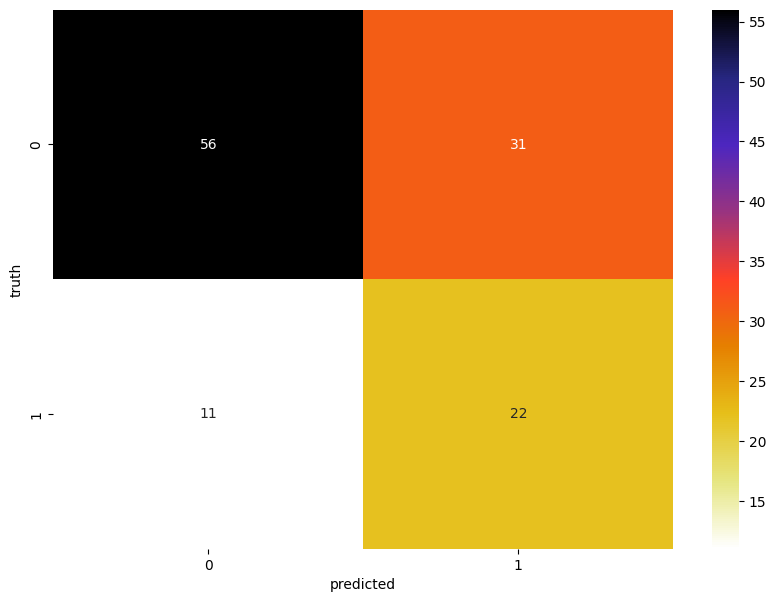

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d', cmap=plt.cm.CMRmap_r)
plt.xlabel('predicted')
plt.ylabel('truth')

# Oversampling

## Using SMOTE(0.92)


In [ ]:
y.value_counts()

0    422
1    178
Name: Loan Defaulted or not, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)
x_sm,y_sm=smote.fit_resample(x_train,y_train)
model1.fit(x_sm_train,y_sm_train)
model1.evaluate(x_test,y_test)


2/2 [==============================] - 0s 11ms/step - loss: 0.2166 - accuracy: 0.9167


[0.2165660858154297, 0.9166666865348816]

In [ ]:
yp_sm=model1.predict(x_test)
yp_sm=np.round(yp_sm)


2/2 [==============================] - 0s 11ms/step


Here,we can see in this classification report that f1 scores of 0 and 1 are quite high and equal.Also,accuracy of the model is imporved

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp_sm))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.81      0.87      0.84        15

    accuracy                           0.92        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.92      0.92      0.92        60



Plotting confusion matrix

Text(95.72222222222221, 0.5, 'truth')

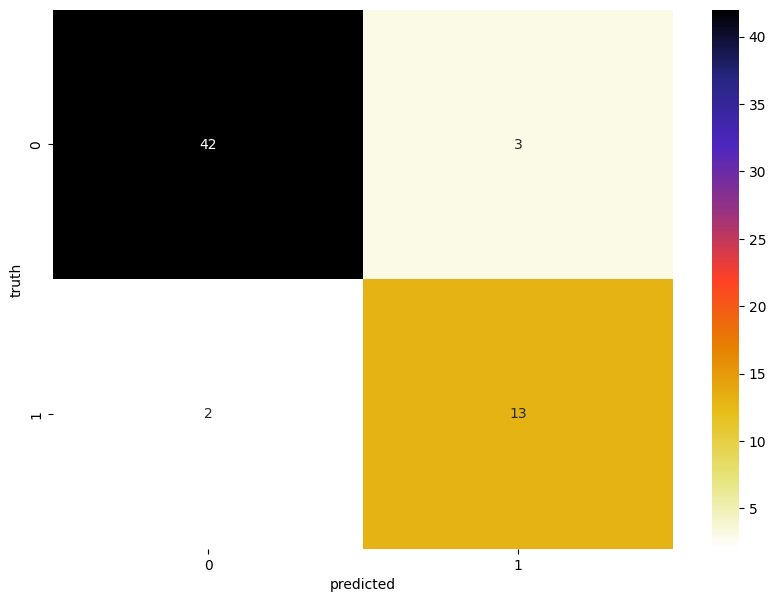

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=yp_sm)
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d', cmap=plt.cm.CMRmap_r)
plt.xlabel('predicted')
plt.ylabel('truth')

## Using Random Oversampler(0.9)

In [ ]:
y.value_counts()

0    422
1    178
Name: Loan Defaulted or not, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy='minority')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)
x_ros,y_ros=ros.fit_resample(x_train,y_train)
model1.fit(x_ros,y_ros)
model1.evaluate(x_test,y_test)


2/2 [==============================] - 0s 9ms/step - loss: 0.2337 - accuracy: 0.9000


[0.2336876541376114, 0.8999999761581421]

In [ ]:
yp_ros=model1.predict(x_test)
yp_ros=np.round(yp_ros)


2/2 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp_ros))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.80      0.80      0.80        15

    accuracy                           0.90        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.90      0.90      0.90        60



Text(95.72222222222221, 0.5, 'truth')

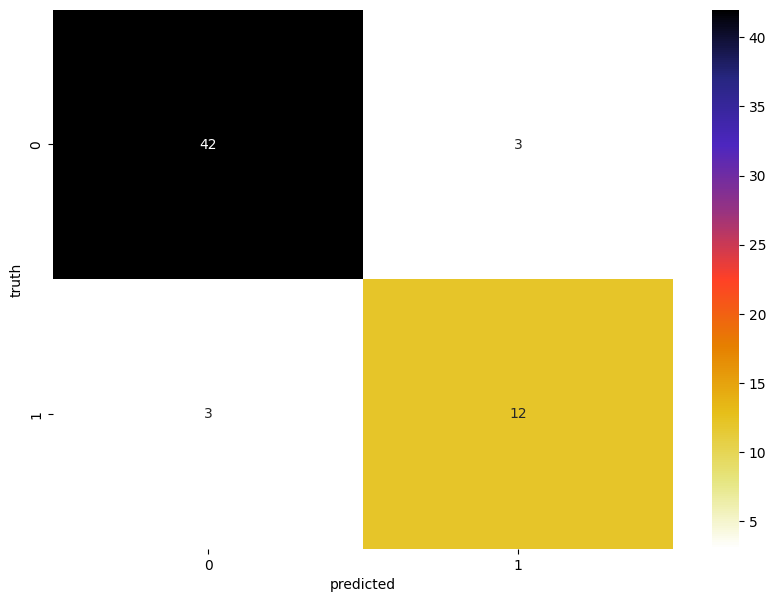

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=yp_ros)
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d', cmap=plt.cm.CMRmap_r)
plt.xlabel('predicted')
plt.ylabel('truth')

# Using Class weights Method to tackle Imbalance(0.83)

In [ ]:
weight={
    0:0.289,
    1:0.71
}

In [ ]:
model1.fit(x_train,y_train,epochs=60,batch_size=8,class_weight=weight)

Epoch 1/60
68/68 [==============================] - 3s 6ms/step - loss: 0.1151 - accuracy: 0.8685
Epoch 2/60
68/68 [==============================] - 0s 7ms/step - loss: 0.1216 - accuracy: 0.8778
Epoch 3/60
68/68 [==============================] - 1s 8ms/step - loss: 0.0995 - accuracy: 0.9056
Epoch 4/60
68/68 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9000
Epoch 5/60
68/68 [==============================] - 0s 6ms/step - loss: 0.0962 - accuracy: 0.8963
Epoch 6/60
68/68 [==============================] - 0s 5ms/step - loss: 0.0929 - accuracy: 0.8963
Epoch 7/60
68/68 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9111
Epoch 8/60
68/68 [==============================] - 0s 7ms/step - loss: 0.0810 - accuracy: 0.9222
Epoch 9/60
68/68 [==============================] - 0s 6ms/step - loss: 0.0779 - accuracy: 0.9111
Epoch 10/60
68/68 [==============================] - 0s 4ms/step - loss: 0.1011 - accuracy: 0.8704
Epoch 11/60
68/68 [

In [ ]:
y_pred=model1.predict(x_test)
y_pred=np.round(y_pred)#Rounding off the predicted values to plot classification report

2/2 [==============================] - 0s 5ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        45
           1       0.62      0.87      0.72        15

    accuracy                           0.83        60
   macro avg       0.78      0.84      0.80        60
weighted avg       0.87      0.83      0.84        60



Text(95.72222222222221, 0.5, 'truth')

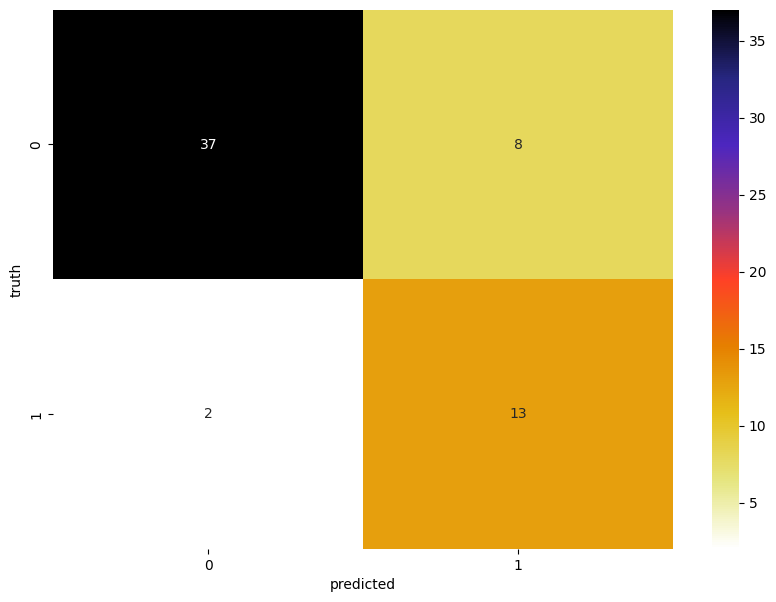

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d', cmap=plt.cm.CMRmap_r)
plt.xlabel('predicted')
plt.ylabel('truth')

# Exporting Model

In [ ]:
import json

In [ ]:
model_json = model1.to_json()
with open("model_final_tuned.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
with open("model_final.json","r") as file:
    model_json=file.read()
loaded_model=model_from_json(model_json)
loaded_model.predict(x_sm_test.sample(1))